In [364]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.cluster import KMeans
import os
import cv2 as cv
import numpy as np
from time import time

%matplotlib inline

(408, 612, 3)
threshold value for template image :  176.0


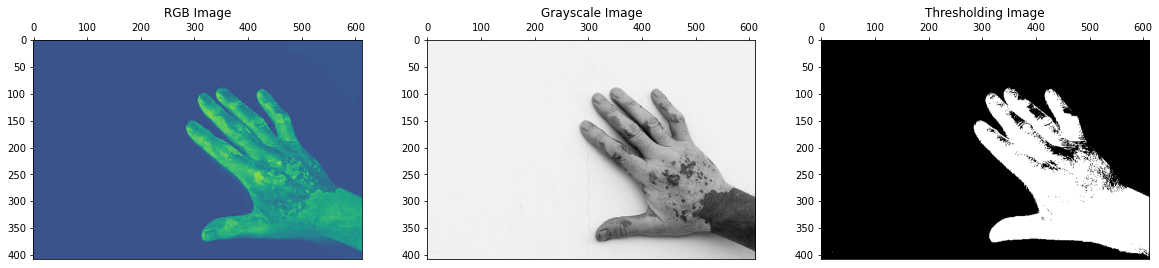

(408, 612)


In [365]:
img_org = cv.imread('img/img1.jpg') 
img_rgb = cv.cvtColor(img_org, cv.COLOR_BGR2YCrCb)
print(img_rgb.shape)
img_rgb = img_rgb[:,:,1]
img_gray = cv.cvtColor(img_org, cv.COLOR_BGR2GRAY)

imgx = img_org.reshape((img_rgb.shape[1]*img_org.shape[0],3)).astype('uint8')


th_t, img_t = cv.threshold(img_gray, 0, 250, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# printing the threshold value that defined from otsu binaraization
print("threshold value for template image : ", th_t)

fig, ax = plt. subplots(1, 3, figsize=(20,20))
ax[0].imshow(img_rgb) # showing image using gray color mapping
ax[0].xaxis.tick_top() # bring the x axis to top
ax[0].set_title("RGB Image")
ax[1].imshow(img_gray, cmap='gray')
ax[1].xaxis.tick_top()
ax[1].set_title("Grayscale Image")
ax[2].imshow(img_t, cmap='gray')
ax[2].xaxis.tick_top()
ax[2].set_title("Thresholding Image")
plt.show()

print(img_rgb.shape)


In [366]:
img = img_rgb/255.0
print(img.shape)

x = img.reshape(-1, 3)
print(x.shape)

(408, 612)
(83232, 3)


In [367]:
km = KMeans(n_clusters=2)
km.fit(x)



KMeans(n_clusters=2)

(408, 612)


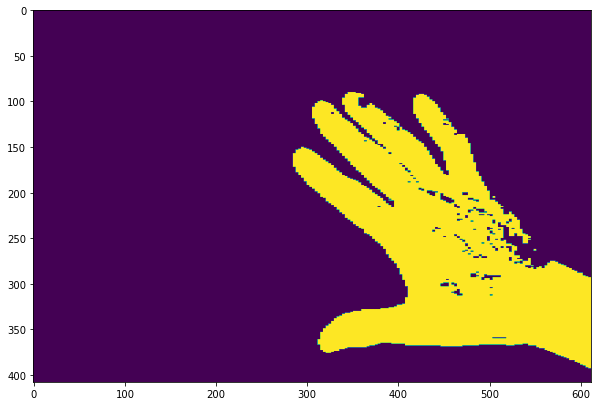

In [368]:
img_seg = km.cluster_centers_
img_seg = img_seg[km.labels_]
img_seg = img_seg.reshape(img_rgb.shape)
print(img_seg.shape)

plt.figure(figsize=(10, 10))
plt.imshow(img_seg)

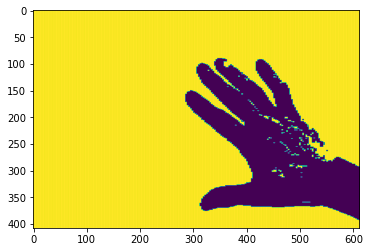

In [373]:
masked_image = np.copy(img_seg)
masked_image = masked_image.reshape((-1, 3))

masked_image[km.labels_ == 1] = [16,16,16]
masked_image[km.labels_ == 0] = [235,240,240]
masked_image = masked_image.reshape(img_rgb.shape)
# show the image
plt.imshow(masked_image)
plt.show()